## Dataset Overview

Most versions of the World Happiness Report include the following fields:

| Column| Description |
| --- | --- |
| Country | Name of the country |
| Happiness Score | Overall score |
| GDP per Capita | Economic contribution |
| Social Support |Perception of social support |
| Healthy Life Expectancy | Life expectancy index |
| Freedom to Make Life Choices | Sense of personal freedom |
| Generosity | Willingness to help others |
| Perceptions of Corruption | Trust in government and institutions |


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
import plotly.express as px

In [2]:
sns.set_context('talk', rc={"axes.labelsize": 12, "xtick.labelsize": 8, "ytick.labelsize": 8})

sns.set_style('white')
plt.rcParams['figure.figsize'] = (10,6)

In [3]:
URL_2019 = 'C:/Users/Eastwood/OneDrive/Documents/Happiness_Index/2019.csv'
URL_2018 = 'C:/Users/Eastwood/OneDrive/Documents/Happiness_Index/2018.csv'
URL_2017 = 'C:/Users/Eastwood/OneDrive/Documents/Happiness_Index/2017.csv'
URL_2016 = 'C:/Users/Eastwood/OneDrive/Documents/Happiness_Index/2016.csv'
URL_2015 = 'C:/Users/Eastwood/OneDrive/Documents/Happiness_Index/2015.csv'

In [4]:
data_2019 = pd.read_csv(URL_2019)
data_2019.head()

Overall rank Country or region  Score  GDP per capita  Social support  \
0             1           Finland  7.769           1.340           1.587   
1             2           Denmark  7.600           1.383           1.573   
2             3            Norway  7.554           1.488           1.582   
3             4           Iceland  7.494           1.380           1.624   
4             5       Netherlands  7.488           1.396           1.522   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.986                         0.596       0.153   
1                    0.996                         0.592       0.252   
2                    1.028                         0.603       0.271   
3                    1.026                         0.591       0.354   
4                    0.999                         0.557       0.322   

   Perceptions of corruption  
0                      0.393  
1                      0.410  
2                      0.341  
3                      0.118  
4                      0.298

In [5]:
data_2018 = pd.read_csv(URL_2018)
data_2018.head()

Overall rank Country or region  Score  GDP per capita  Social support  \
0             1           Finland  7.632           1.305           1.592   
1             2            Norway  7.594           1.456           1.582   
2             3           Denmark  7.555           1.351           1.590   
3             4           Iceland  7.495           1.343           1.644   
4             5       Switzerland  7.487           1.420           1.549   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.874                         0.681       0.202   
1                    0.861                         0.686       0.286   
2                    0.868                         0.683       0.284   
3                    0.914                         0.677       0.353   
4                    0.927                         0.660       0.256   

   Perceptions of corruption  
0                      0.393  
1                      0.340  
2                      0.408  
3                      0.138  
4                      0.357

In [6]:
data_2017 = pd.read_csv(URL_2017)
data_2017.head()

Country  Happiness.Rank  Happiness.Score  Whisker.high  Whisker.low  \
0       Norway               1            7.537      7.594445     7.479556   
1      Denmark               2            7.522      7.581728     7.462272   
2      Iceland               3            7.504      7.622030     7.385970   
3  Switzerland               4            7.494      7.561772     7.426227   
4      Finland               5            7.469      7.527542     7.410458   

   Economy..GDP.per.Capita.    Family  Health..Life.Expectancy.   Freedom  \
0                  1.616463  1.533524                  0.796667  0.635423   
1                  1.482383  1.551122                  0.792566  0.626007   
2                  1.480633  1.610574                  0.833552  0.627163   
3                  1.564980  1.516912                  0.858131  0.620071   
4                  1.443572  1.540247                  0.809158  0.617951   

   Generosity  Trust..Government.Corruption.  Dystopia.Residual  
0    0.362012                       0.315964           2.277027  
1    0.355280                       0.400770           2.313707  
2    0.475540                       0.153527           2.322715  
3    0.290549                       0.367007           2.276716  
4    0.245483                       0.382612           2.430182

In [7]:
data_2016 = pd.read_csv(URL_2016)
data_2016.head()

Country          Region  Happiness Rank  Happiness Score  \
0      Denmark  Western Europe               1            7.526   
1  Switzerland  Western Europe               2            7.509   
2      Iceland  Western Europe               3            7.501   
3       Norway  Western Europe               4            7.498   
4      Finland  Western Europe               5            7.413   

   Lower Confidence Interval  Upper Confidence Interval  \
0                      7.460                      7.592   
1                      7.428                      7.590   
2                      7.333                      7.669   
3                      7.421                      7.575   
4                      7.351                      7.475   

   Economy (GDP per Capita)   Family  Health (Life Expectancy)  Freedom  \
0                   1.44178  1.16374                   0.79504  0.57941   
1                   1.52733  1.14524                   0.86303  0.58557   
2                   1.42666  1.18326                   0.86733  0.56624   
3                   1.57744  1.12690                   0.79579  0.59609   
4                   1.40598  1.13464                   0.81091  0.57104   

   Trust (Government Corruption)  Generosity  Dystopia Residual  
0                        0.44453     0.36171            2.73939  
1                        0.41203     0.28083            2.69463  
2                        0.14975     0.47678            2.83137  
3                        0.35776     0.37895            2.66465  
4                        0.41004     0.25492            2.82596

In [8]:
data_2015 = pd.read_csv(URL_2015)
data_2015.head()

Country          Region  Happiness Rank  Happiness Score  \
0  Switzerland  Western Europe               1            7.587   
1      Iceland  Western Europe               2            7.561   
2      Denmark  Western Europe               3            7.527   
3       Norway  Western Europe               4            7.522   
4       Canada   North America               5            7.427   

   Standard Error  Economy (GDP per Capita)   Family  \
0         0.03411                   1.39651  1.34951   
1         0.04884                   1.30232  1.40223   
2         0.03328                   1.32548  1.36058   
3         0.03880                   1.45900  1.33095   
4         0.03553                   1.32629  1.32261   

   Health (Life Expectancy)  Freedom  Trust (Government Corruption)  \
0                   0.94143  0.66557                        0.41978   
1                   0.94784  0.62877                        0.14145   
2                   0.87464  0.64938                        0.48357   
3                   0.88521  0.66973                        0.36503   
4                   0.90563  0.63297                        0.32957   

   Generosity  Dystopia Residual  
0     0.29678            2.51738  
1     0.43630            2.70201  
2     0.34139            2.49204  
3     0.34699            2.46531  
4     0.45811            2.45176

In [9]:
print(f'The description of the given data: ')
print()
print({data_2019.info()})
print({data_2018.info()})
print({data_2017.info()})
print({data_2016.info()})
print({data_2015.info()})

The description of the given data: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB
{None}
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        N

Upon review of the assorted datasets, 2015-2017 has been selected for the cluster model

## Data Cleaning

In [10]:
print(f'Checking null values of the 2017 dataset: \n{data_2017.isnull().sum()}')
print(f'Checking null values of the 2016 dataset: \n{data_2016.isnull().sum()}')
print(f'Checking null values of the 2015 dataset: \n{data_2015.isnull().sum()}')

Checking null values of the 2017 dataset: 
Country                          0
Happiness.Rank                   0
Happiness.Score                  0
Whisker.high                     0
Whisker.low                      0
Economy..GDP.per.Capita.         0
Family                           0
Health..Life.Expectancy.         0
Freedom                          0
Generosity                       0
Trust..Government.Corruption.    0
Dystopia.Residual                0
dtype: int64
Checking null values of the 2016 dataset: 
Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Lower Confidence Interval        0
Upper Confidence Interval        0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64
Checking null

In [11]:
print('Checking any duplicated values in 2017 dataframe: {}'.format(data_2017.duplicated().sum()))
print('Checking any duplicated values in 2016 dataframe: {}'.format(data_2016.duplicated().sum()))
print('Checking any duplicated values in 2015 dataframe: {}'.format(data_2015.duplicated().sum()))

Checking any duplicated values in 2017 dataframe: 0
Checking any duplicated values in 2016 dataframe: 0
Checking any duplicated values in 2015 dataframe: 0


USA has inconsistent naming scheme across APIs used, fix

In [12]:
data_2017.replace('United States', 'United States of America', inplace=True)
data_2016.replace('United States', 'United States of America', inplace=True)
data_2015.replace('United States', 'United States of America', inplace=True)

### 2017

In [13]:
data_2017.head()

Country  Happiness.Rank  Happiness.Score  Whisker.high  Whisker.low  \
0       Norway               1            7.537      7.594445     7.479556   
1      Denmark               2            7.522      7.581728     7.462272   
2      Iceland               3            7.504      7.622030     7.385970   
3  Switzerland               4            7.494      7.561772     7.426227   
4      Finland               5            7.469      7.527542     7.410458   

   Economy..GDP.per.Capita.    Family  Health..Life.Expectancy.   Freedom  \
0                  1.616463  1.533524                  0.796667  0.635423   
1                  1.482383  1.551122                  0.792566  0.626007   
2                  1.480633  1.610574                  0.833552  0.627163   
3                  1.564980  1.516912                  0.858131  0.620071   
4                  1.443572  1.540247                  0.809158  0.617951   

   Generosity  Trust..Government.Corruption.  Dystopia.Residual  
0    0.362012                       0.315964           2.277027  
1    0.355280                       0.400770           2.313707  
2    0.475540                       0.153527           2.322715  
3    0.290549                       0.367007           2.276716  
4    0.245483                       0.382612           2.430182

#### Rename Columns

In [14]:
data_2017.rename(columns={'Happiness.Rank': 'Happiness Rank'}, inplace=True)
data_2017.rename(columns={'Happiness.Score': 'Happiness Score'}, inplace=True)
data_2017.rename(columns={'Whisker.high': 'Upper Confidence Interval'}, inplace=True)
data_2017.rename(columns={'Whisker.low': 'Lower Confidence Interval'}, inplace=True)
data_2017.rename(columns={'Economy..GDP.per.Capita.': 'Economy (GDP per Capita)'}, inplace=True)
data_2017.rename(columns={'Health..Life.Expectancy.': 'Health (Life Expectancy)'}, inplace=True)
data_2017.rename(columns={'Trust..Government.Corruption.': 'Trust (Government Corruption)'}, inplace=True)
data_2017.rename(columns={'Dystopia.Residual': 'Dystopia Residual'}, inplace=True)

#### Add Regions

In [15]:
# Example: using 2020 dataset
region_map = data_2016[['Country', 'Region']].drop_duplicates()
region_map.columns = ['Country', 'Region']

data_2017 = data_2017.merge(region_map, on='Country', how='left')

#### Drop Columns

In [16]:
data_2017  = data_2017.drop(columns=['Happiness Rank', 'Upper Confidence Interval', 'Lower Confidence Interval'])

In [17]:
data_2017.head()

Country  Happiness Score  Economy (GDP per Capita)    Family  \
0       Norway            7.537                  1.616463  1.533524   
1      Denmark            7.522                  1.482383  1.551122   
2      Iceland            7.504                  1.480633  1.610574   
3  Switzerland            7.494                  1.564980  1.516912   
4      Finland            7.469                  1.443572  1.540247   

   Health (Life Expectancy)   Freedom  Generosity  \
0                  0.796667  0.635423    0.362012   
1                  0.792566  0.626007    0.355280   
2                  0.833552  0.627163    0.475540   
3                  0.858131  0.620071    0.290549   
4                  0.809158  0.617951    0.245483   

   Trust (Government Corruption)  Dystopia Residual          Region  
0                       0.315964           2.277027  Western Europe  
1                       0.400770           2.313707  Western Europe  
2                       0.153527           2.322715  Western Europe  
3                       0.367007           2.276716  Western Europe  
4                       0.382612           2.430182  Western Europe

#### Numeric Features

In [18]:
numeric_features = data_2017.select_dtypes(include=np.number).columns.tolist()
data_2017_num = data_2017[numeric_features]

In [19]:
print("\nNumeric Columns Used for Clustering:")
print(numeric_features)


Numeric Columns Used for Clustering:
['Happiness Score', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Generosity', 'Trust (Government Corruption)', 'Dystopia Residual']


### 2016

In [20]:
data_2016.head()

Country          Region  Happiness Rank  Happiness Score  \
0      Denmark  Western Europe               1            7.526   
1  Switzerland  Western Europe               2            7.509   
2      Iceland  Western Europe               3            7.501   
3       Norway  Western Europe               4            7.498   
4      Finland  Western Europe               5            7.413   

   Lower Confidence Interval  Upper Confidence Interval  \
0                      7.460                      7.592   
1                      7.428                      7.590   
2                      7.333                      7.669   
3                      7.421                      7.575   
4                      7.351                      7.475   

   Economy (GDP per Capita)   Family  Health (Life Expectancy)  Freedom  \
0                   1.44178  1.16374                   0.79504  0.57941   
1                   1.52733  1.14524                   0.86303  0.58557   
2                   1.42666  1.18326                   0.86733  0.56624   
3                   1.57744  1.12690                   0.79579  0.59609   
4                   1.40598  1.13464                   0.81091  0.57104   

   Trust (Government Corruption)  Generosity  Dystopia Residual  
0                        0.44453     0.36171            2.73939  
1                        0.41203     0.28083            2.69463  
2                        0.14975     0.47678            2.83137  
3                        0.35776     0.37895            2.66465  
4                        0.41004     0.25492            2.82596

#### Drop Columns

In [21]:
data_2016  = data_2016.drop(columns=['Happiness Rank', 'Upper Confidence Interval', 'Lower Confidence Interval'])

In [22]:
data_2016.head()

Country          Region  Happiness Score  Economy (GDP per Capita)  \
0      Denmark  Western Europe            7.526                   1.44178   
1  Switzerland  Western Europe            7.509                   1.52733   
2      Iceland  Western Europe            7.501                   1.42666   
3       Norway  Western Europe            7.498                   1.57744   
4      Finland  Western Europe            7.413                   1.40598   

    Family  Health (Life Expectancy)  Freedom  Trust (Government Corruption)  \
0  1.16374                   0.79504  0.57941                        0.44453   
1  1.14524                   0.86303  0.58557                        0.41203   
2  1.18326                   0.86733  0.56624                        0.14975   
3  1.12690                   0.79579  0.59609                        0.35776   
4  1.13464                   0.81091  0.57104                        0.41004   

   Generosity  Dystopia Residual  
0     0.36171            2.73939  
1     0.28083            2.69463  
2     0.47678            2.83137  
3     0.37895            2.66465  
4     0.25492            2.82596

#### Numeric Features

In [23]:
numeric_features = data_2016.select_dtypes(include=np.number).columns.tolist()
data_2016_num = data_2016[numeric_features]

In [24]:
print("\nNumeric Columns Used for Clustering:")
print(numeric_features)


Numeric Columns Used for Clustering:
['Happiness Score', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual']


### 2015

In [25]:
data_2015.head()

Country          Region  Happiness Rank  Happiness Score  \
0  Switzerland  Western Europe               1            7.587   
1      Iceland  Western Europe               2            7.561   
2      Denmark  Western Europe               3            7.527   
3       Norway  Western Europe               4            7.522   
4       Canada   North America               5            7.427   

   Standard Error  Economy (GDP per Capita)   Family  \
0         0.03411                   1.39651  1.34951   
1         0.04884                   1.30232  1.40223   
2         0.03328                   1.32548  1.36058   
3         0.03880                   1.45900  1.33095   
4         0.03553                   1.32629  1.32261   

   Health (Life Expectancy)  Freedom  Trust (Government Corruption)  \
0                   0.94143  0.66557                        0.41978   
1                   0.94784  0.62877                        0.14145   
2                   0.87464  0.64938                        0.48357   
3                   0.88521  0.66973                        0.36503   
4                   0.90563  0.63297                        0.32957   

   Generosity  Dystopia Residual  
0     0.29678            2.51738  
1     0.43630            2.70201  
2     0.34139            2.49204  
3     0.34699            2.46531  
4     0.45811            2.45176

#### Drop Happiness Rank

In [26]:
data_2015  = data_2015.drop(columns=['Happiness Rank', 'Standard Error'])

In [27]:
data_2015.head()

Country          Region  Happiness Score  Economy (GDP per Capita)  \
0  Switzerland  Western Europe            7.587                   1.39651   
1      Iceland  Western Europe            7.561                   1.30232   
2      Denmark  Western Europe            7.527                   1.32548   
3       Norway  Western Europe            7.522                   1.45900   
4       Canada   North America            7.427                   1.32629   

    Family  Health (Life Expectancy)  Freedom  Trust (Government Corruption)  \
0  1.34951                   0.94143  0.66557                        0.41978   
1  1.40223                   0.94784  0.62877                        0.14145   
2  1.36058                   0.87464  0.64938                        0.48357   
3  1.33095                   0.88521  0.66973                        0.36503   
4  1.32261                   0.90563  0.63297                        0.32957   

   Generosity  Dystopia Residual  
0     0.29678            2.51738  
1     0.43630            2.70201  
2     0.34139            2.49204  
3     0.34699            2.46531  
4     0.45811            2.45176

#### Numeric Features

In [28]:
numeric_features = data_2015.select_dtypes(include=np.number).columns.tolist()
data_2015_num = data_2015[numeric_features]

In [29]:
print("\nNumeric Columns Used for Clustering:")
print(numeric_features)


Numeric Columns Used for Clustering:
['Happiness Score', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual']


## Exploratory Data Analysis

### Heatmaps

#### 2017

<Axes: >

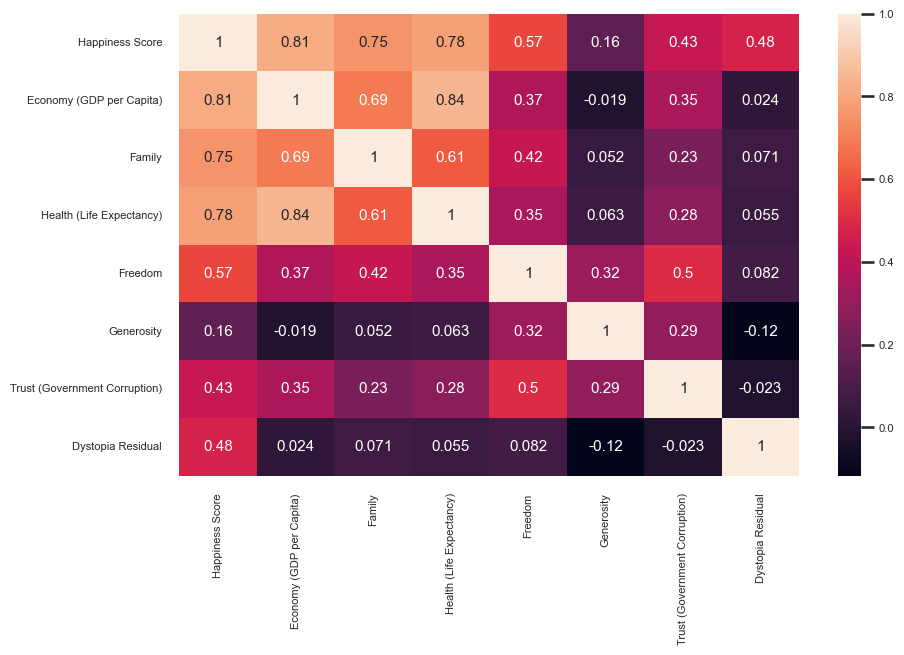

In [30]:
plt.figure(figsize=(10,6))
sns.heatmap(data_2017_num.corr(), annot= True, annot_kws={"size":11})

#### 2016

<Axes: >

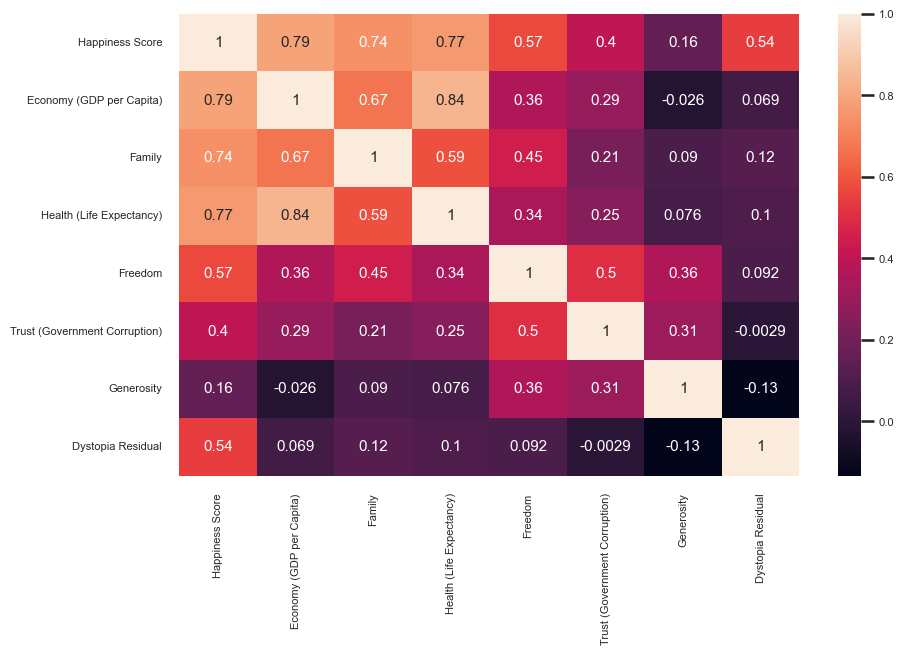

In [31]:
plt.figure(figsize=(10,6))
sns.heatmap(data_2016_num.corr(), annot= True, annot_kws={"size":11})

#### 2015

<Axes: >

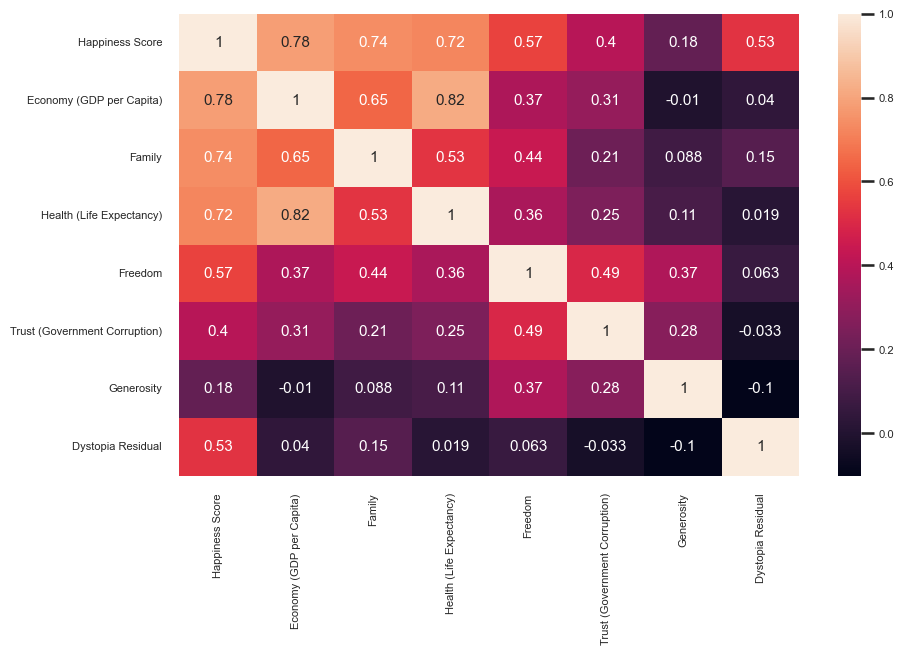

In [32]:
plt.figure(figsize=(10,6))
sns.heatmap(data_2015_num.corr(), annot= True, annot_kws={"size":11})

### Pairplots

#### 2017

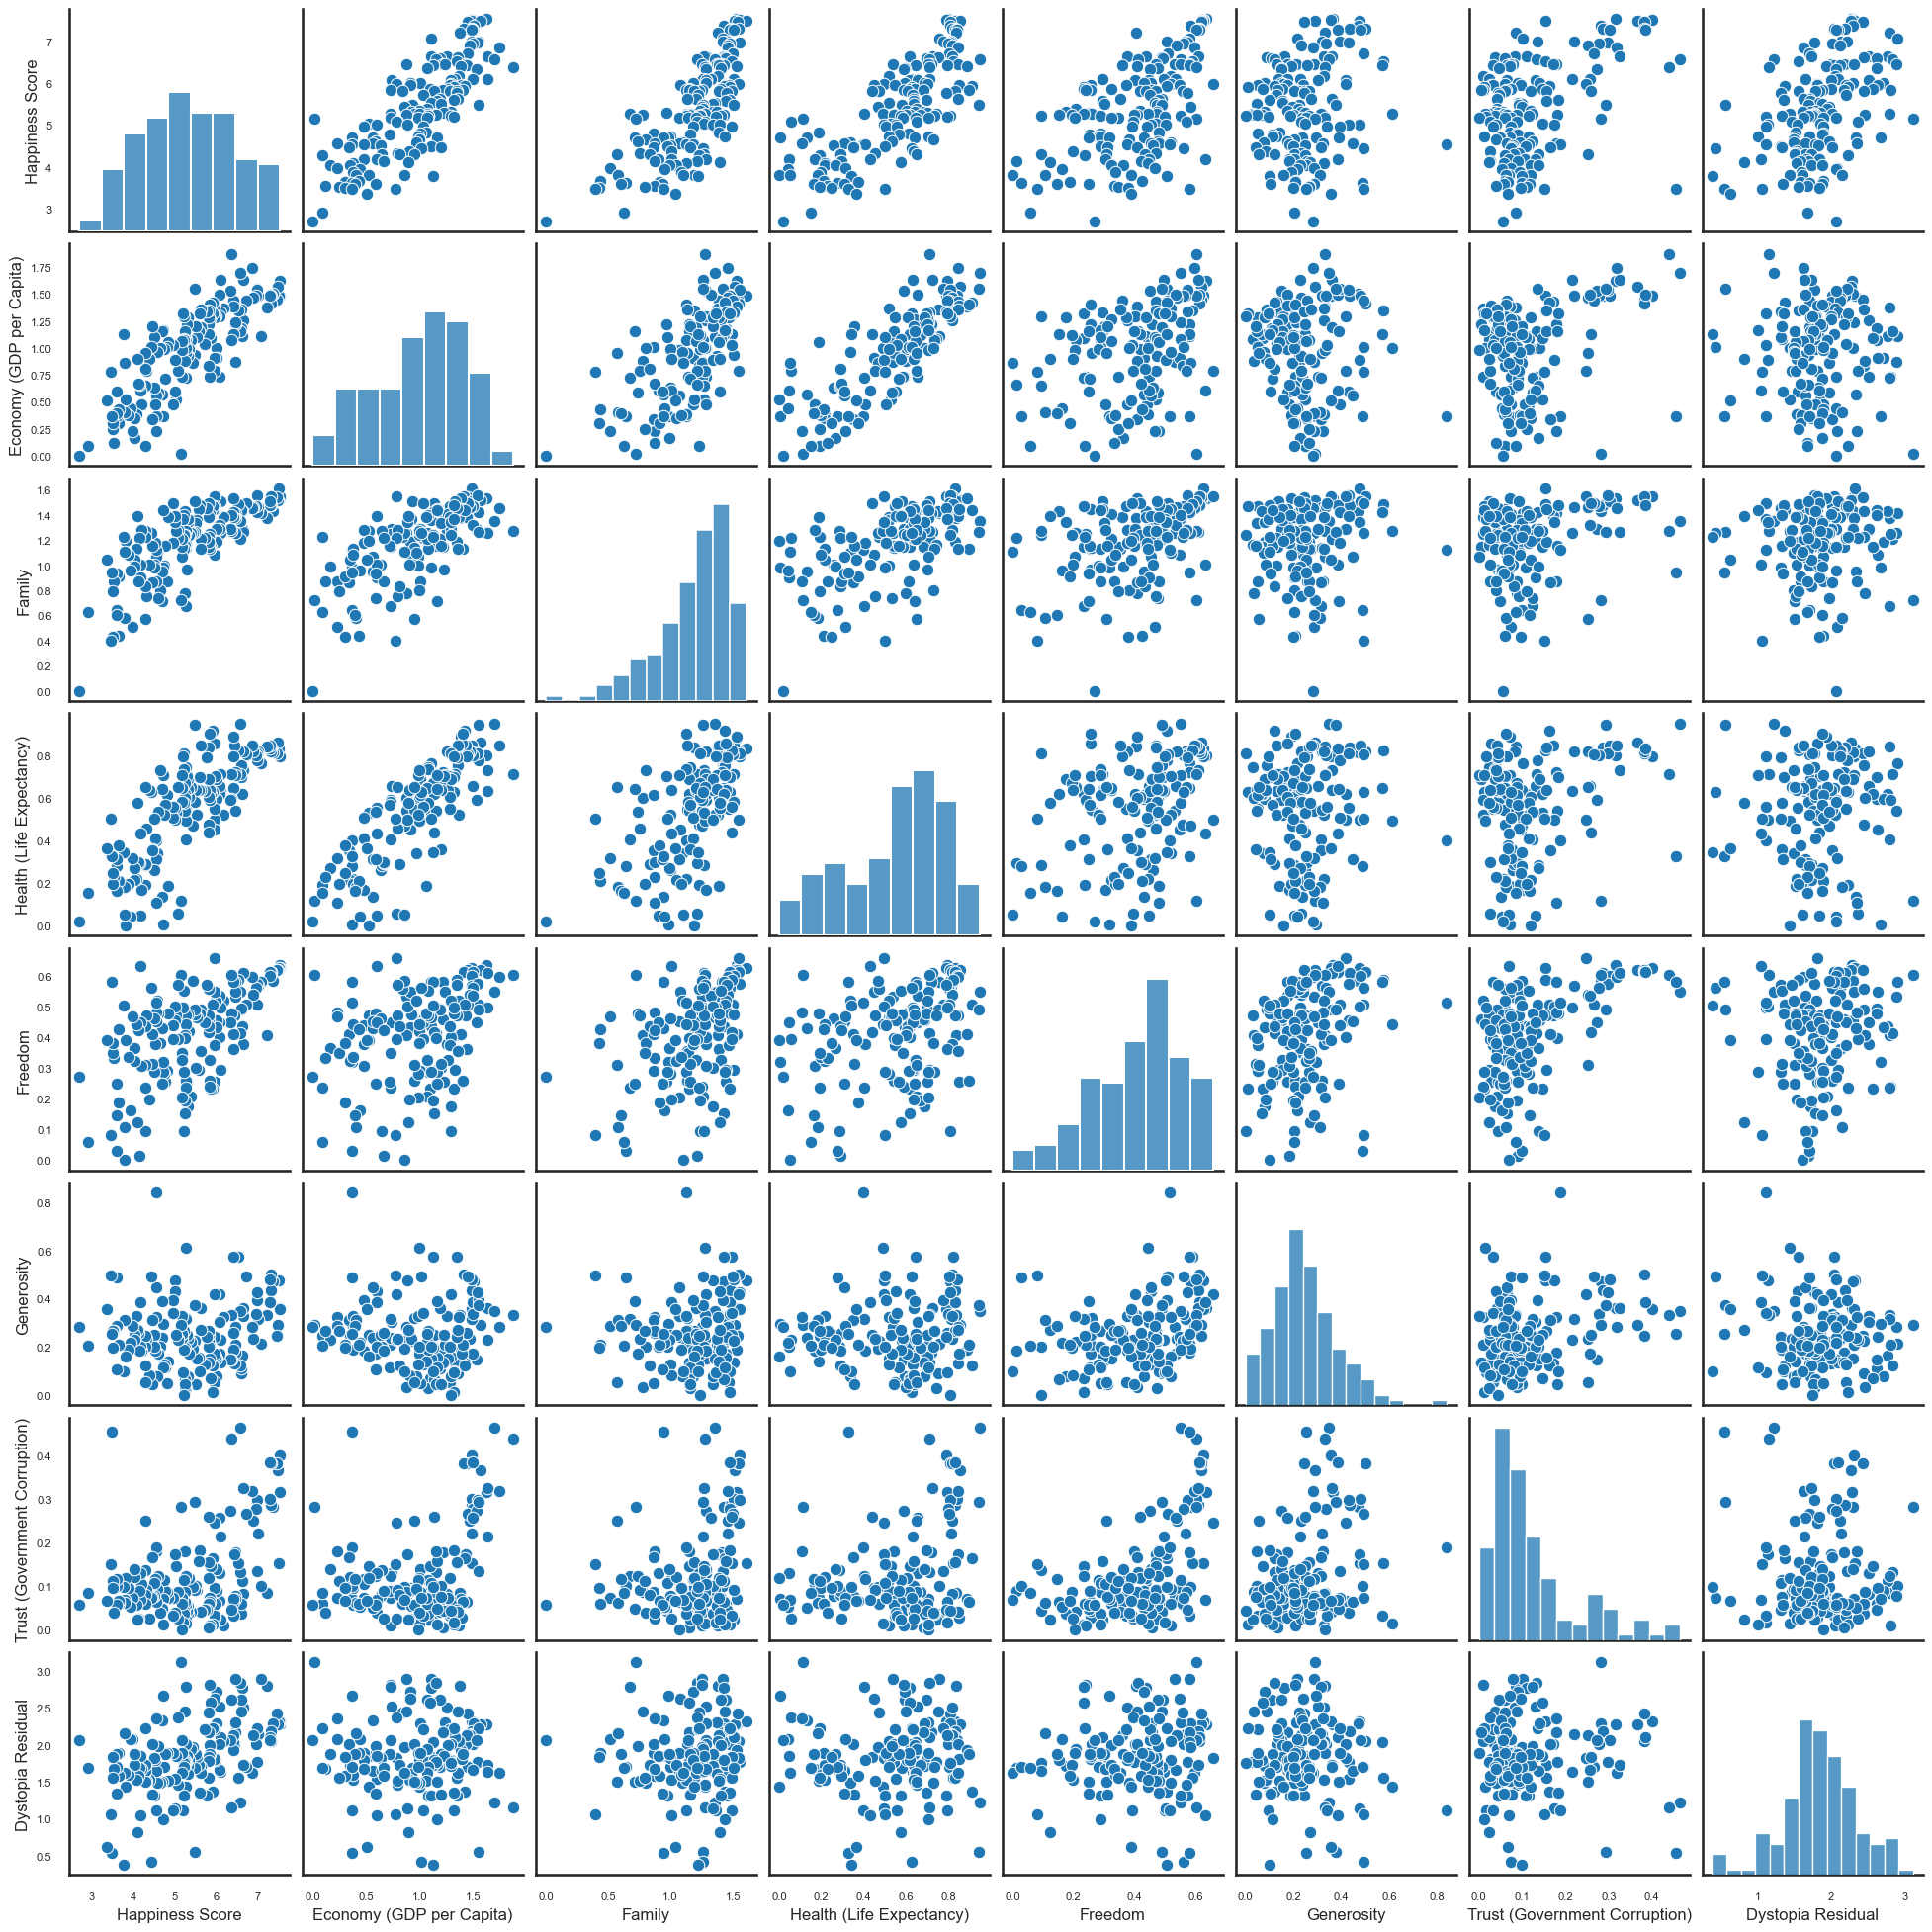

In [33]:
sns.pairplot(data_2017_num)

#### 2016

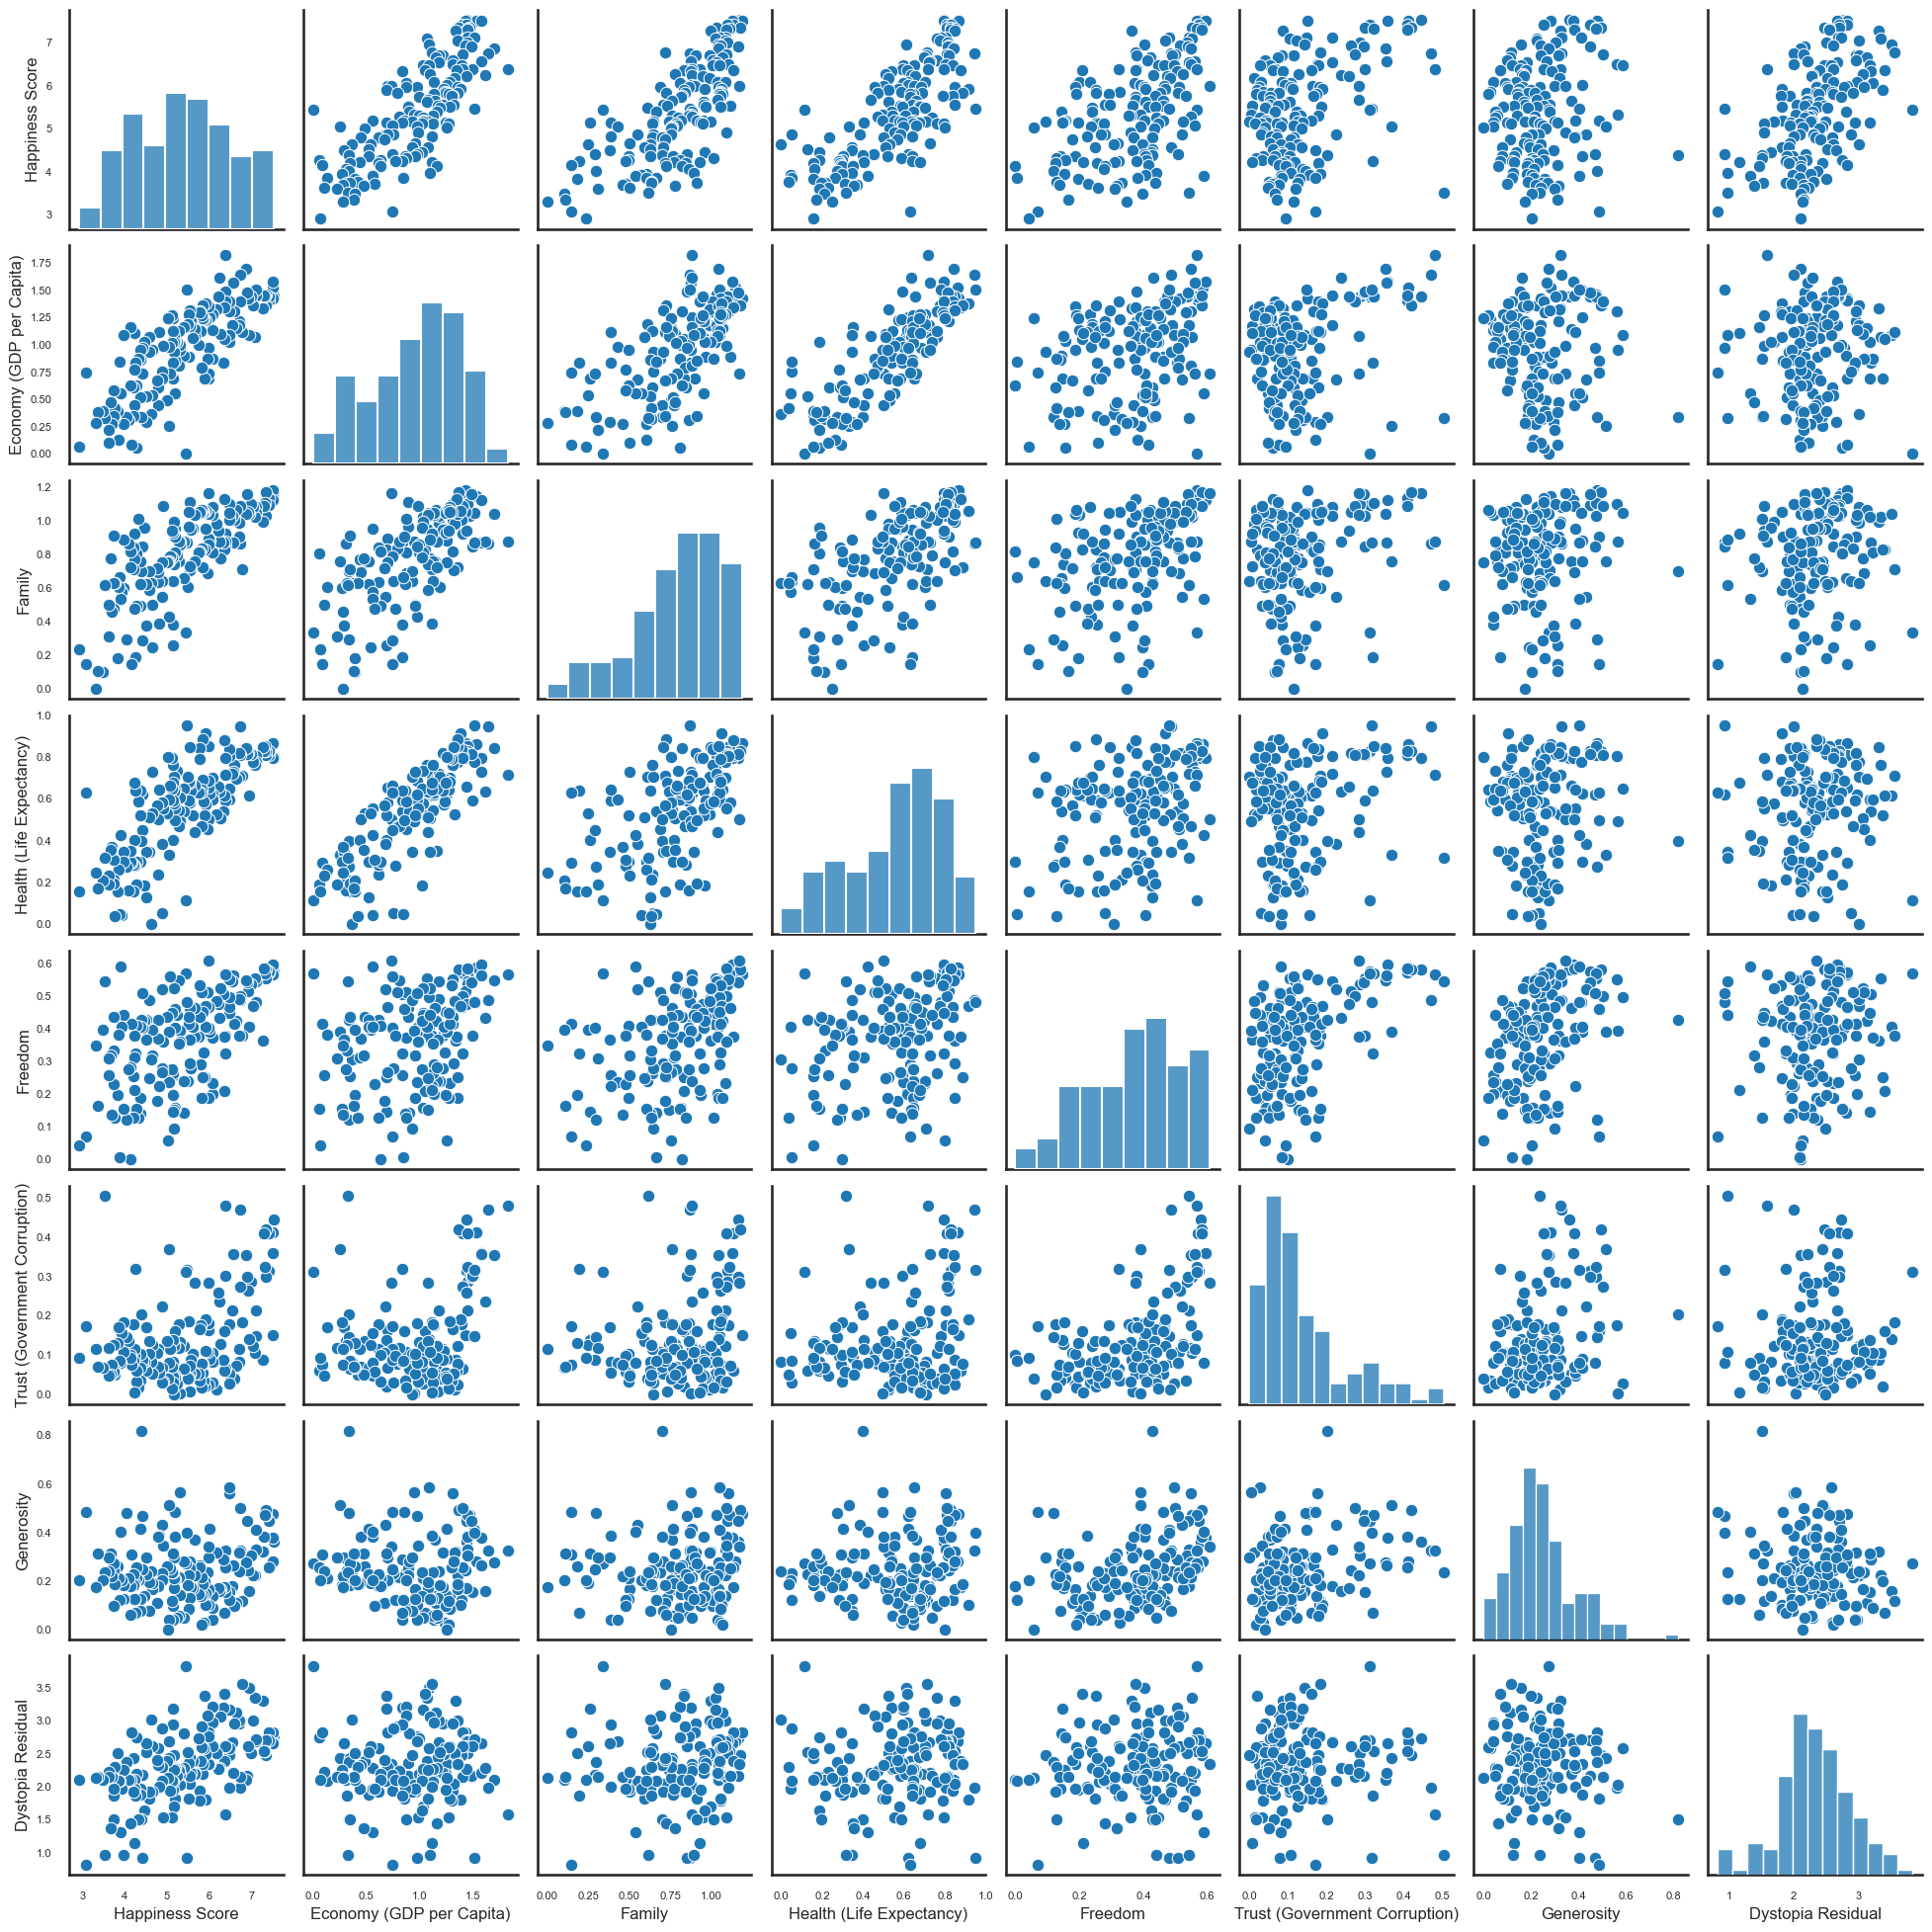

In [34]:
sns.pairplot(data_2016_num)

#### 2015

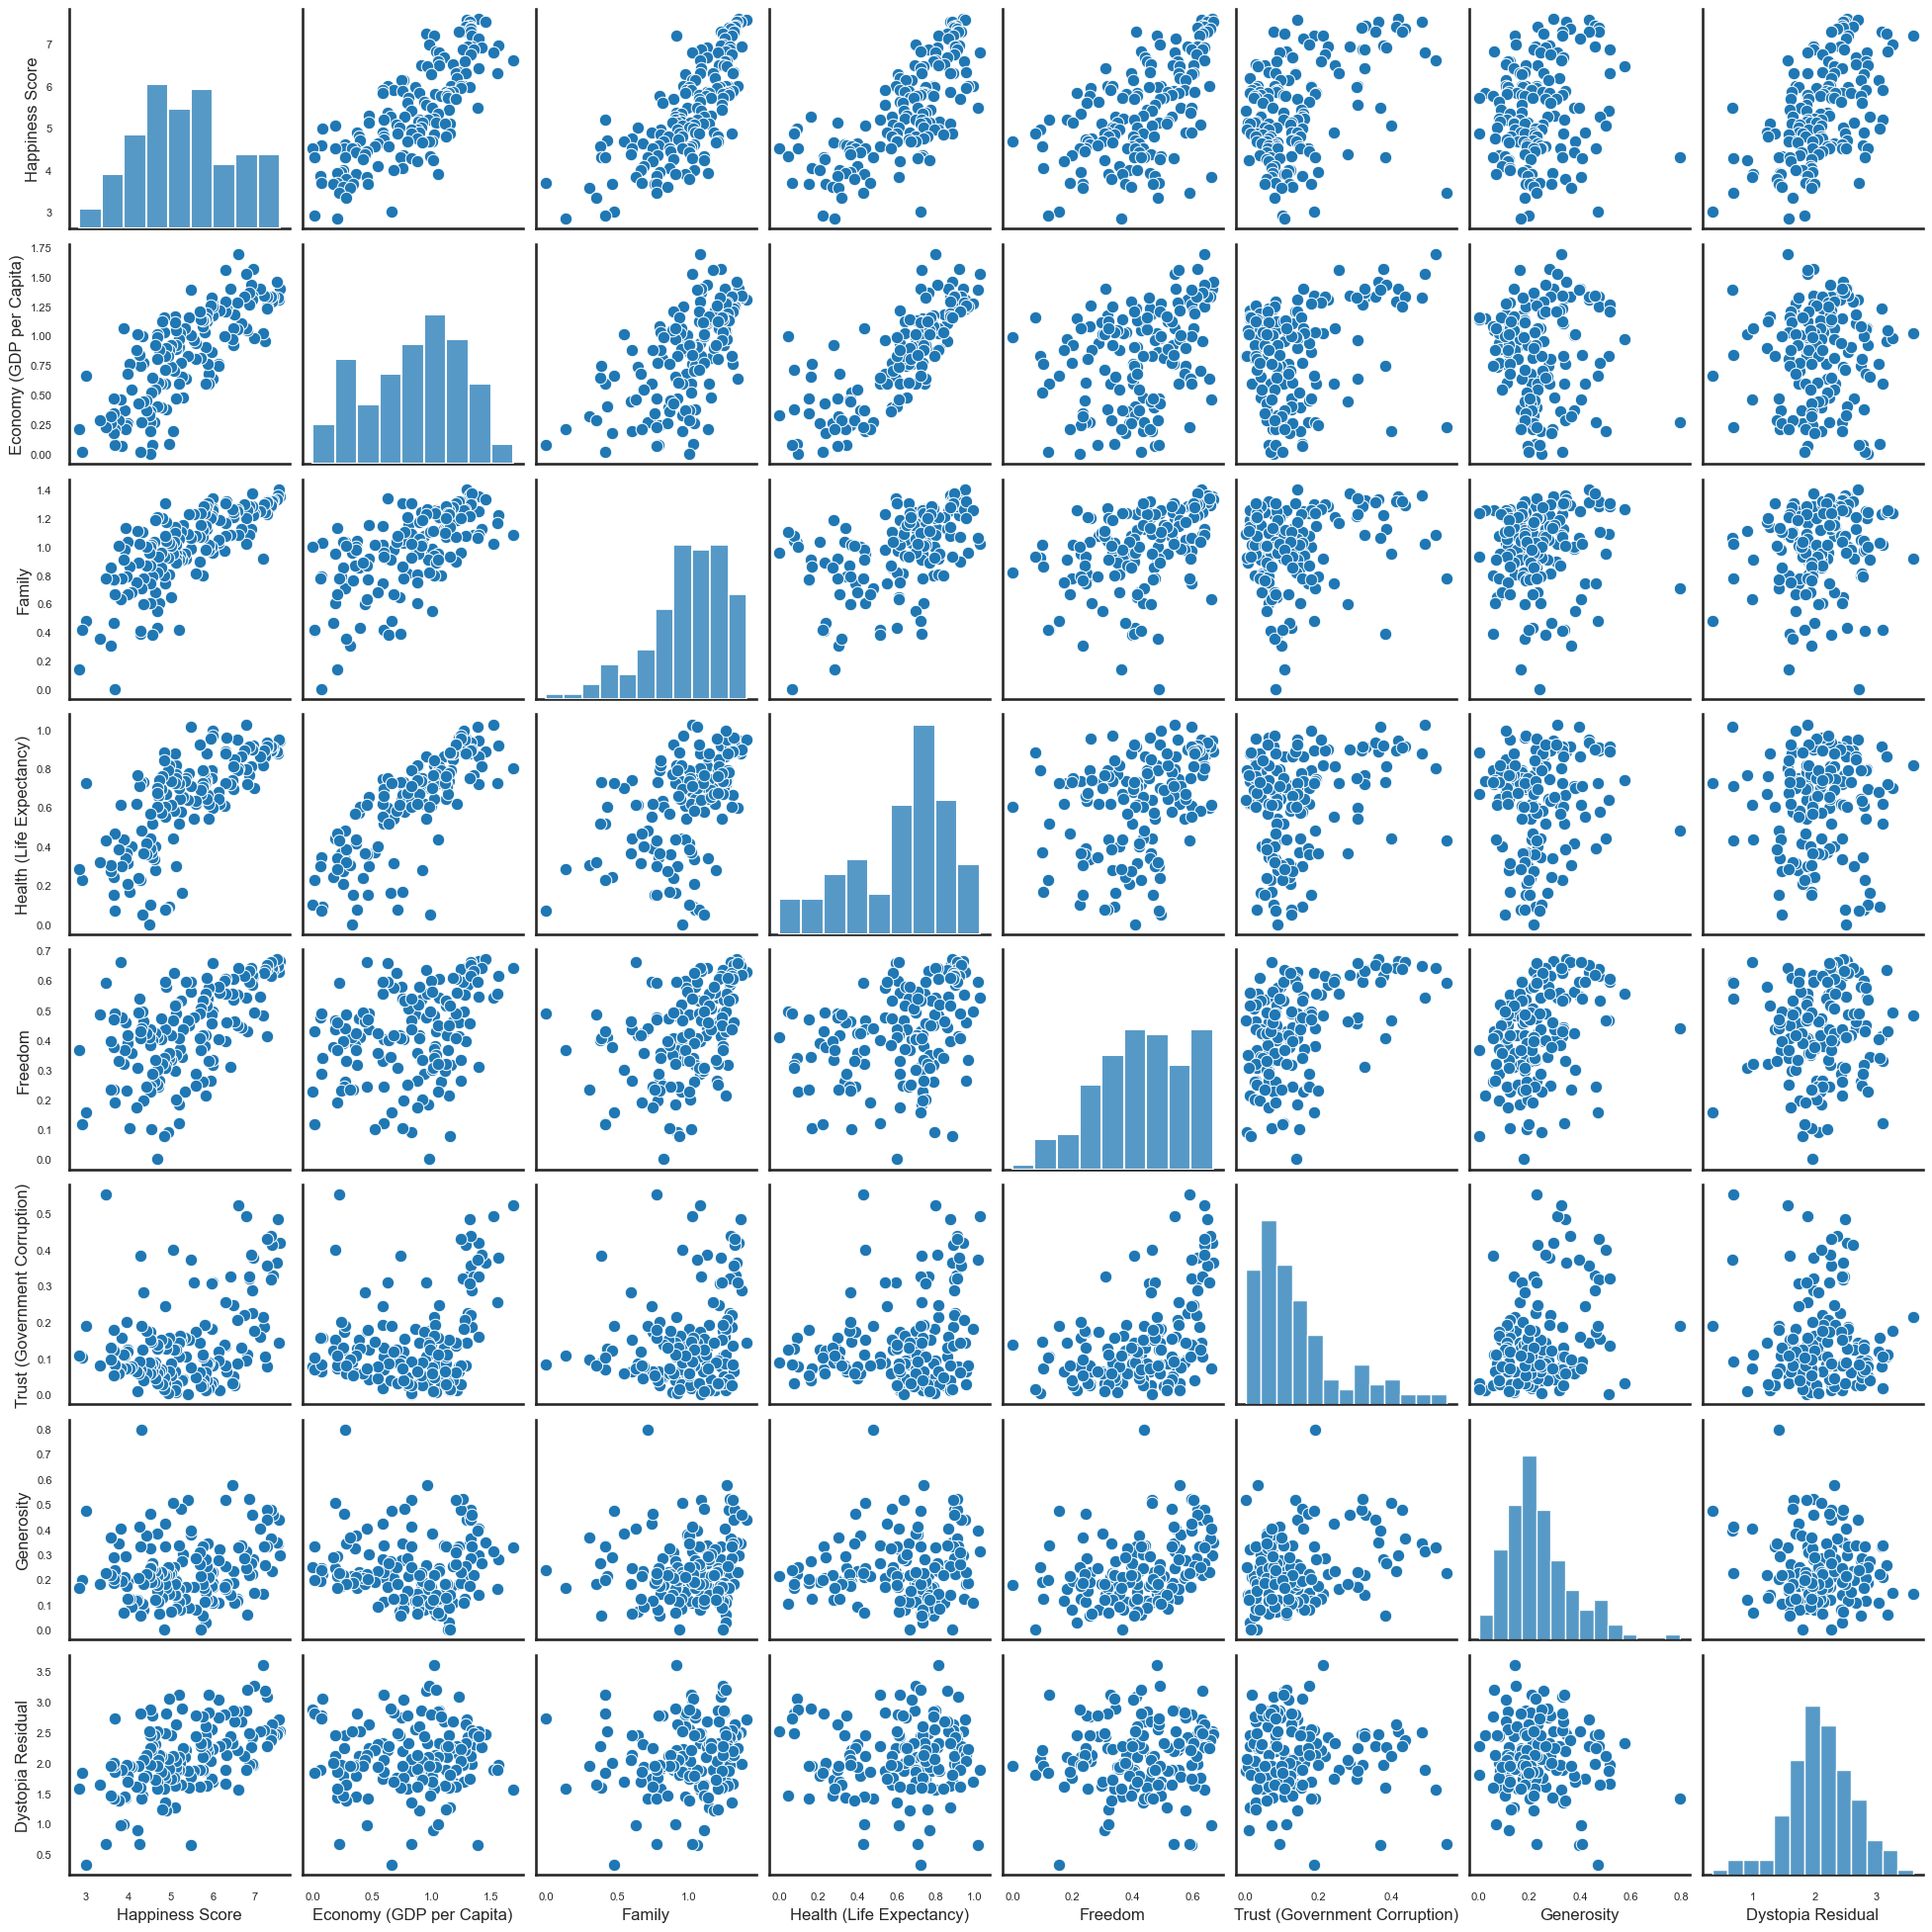

In [35]:
sns.pairplot(data_2015_num)

### Country Happiness Heatmap
 - workaround by saving as html, folium does not displaying locally on my device

In [36]:
import folium
import requests
import webbrowser

#### 2017

In [37]:
data = data_2017.copy()

url = 'https://raw.githubusercontent.com/python-visualization/folium/master/examples/data/world-countries.json'
world_geo = requests.get(url).json()

m = folium.Map(location=[20, 0], zoom_start=2, tiles='cartodb positron')

folium.Choropleth(
    geo_data=world_geo,
    data=data,
    columns=['Country', 'Happiness Score'],
    key_on='feature.properties.name',
    fill_color='YlGnBu',
    fill_opacity=0.8,
    line_opacity=0.3,
    nan_fill_color='lightgrey',
    legend_name='World Happiness Score (2017)'
).add_to(m)

folium.GeoJsonTooltip(
    fields=['name'],
    aliases=['Country:']
)

m.save("folium_heatmap_2017.html")
webbrowser.open("folium_heatmap_2017.html")

True

#### 2016

In [38]:
data = data_2016.copy()

url = 'https://raw.githubusercontent.com/python-visualization/folium/master/examples/data/world-countries.json'
world_geo = requests.get(url).json()

m = folium.Map(location=[20, 0], zoom_start=2, tiles='cartodb positron')

folium.Choropleth(
    geo_data=world_geo,
    data=data,
    columns=['Country', 'Happiness Score'],
    key_on='feature.properties.name',
    fill_color='YlGnBu',
    fill_opacity=0.8,
    line_opacity=0.3,
    nan_fill_color='lightgrey',
    legend_name='World Happiness Score (2016)'
).add_to(m)

folium.GeoJsonTooltip(
    fields=['name'],
    aliases=['Country:']
)

m.save("folium_heatmap_2016.html")
webbrowser.open("folium_heatmap_2016.html")

True

#### 2015

In [39]:
data = data_2015.copy()

url = 'https://raw.githubusercontent.com/python-visualization/folium/master/examples/data/world-countries.json'
world_geo = requests.get(url).json()

m = folium.Map(location=[20, 0], zoom_start=2, tiles='cartodb positron')

folium.Choropleth(
    geo_data=world_geo,
    data=data,
    columns=['Country', 'Happiness Score'],
    key_on='feature.properties.name',
    fill_color='YlGnBu',
    fill_opacity=0.8,
    line_opacity=0.3,
    nan_fill_color='lightgrey',
    legend_name='World Happiness Score (2015)'
).add_to(m)

folium.GeoJsonTooltip(
    fields=['name'],
    aliases=['Country:']
)

m.save("folium_heatmap_2015.html")
webbrowser.open("folium_heatmap_2015.html")

True

### Average Score for each Region

#### 2017

C:\Users\Eastwood\AppData\Local\Temp\ipykernel_16848\3783167412.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_avg.values, y=region_avg.index, palette='YlGnBu')


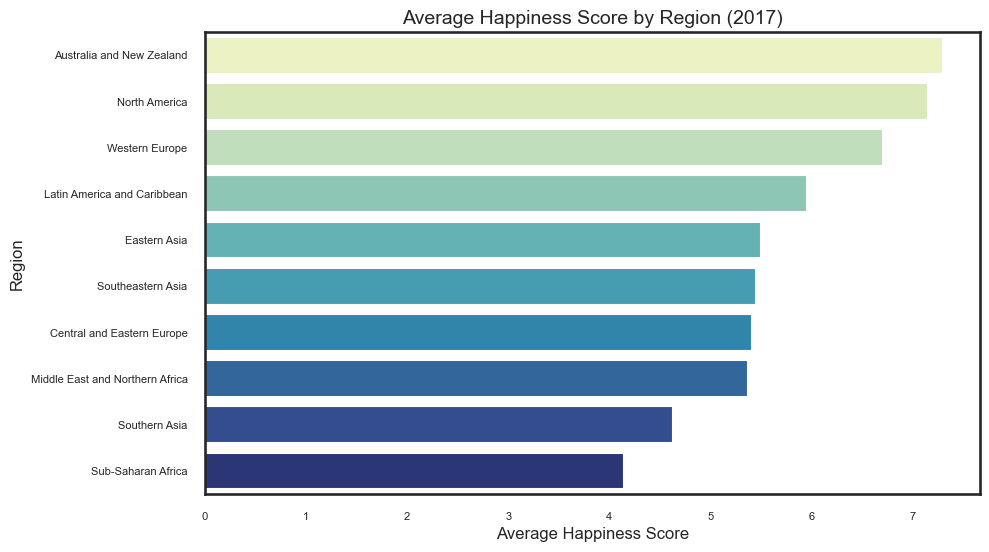

In [40]:
# Make sure you have these columns: 'Region' and 'Ladder score'
region_avg = data_2017.groupby('Region')['Happiness Score'].mean().sort_values(ascending=False)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x=region_avg.values, y=region_avg.index, palette='YlGnBu')
plt.title('Average Happiness Score by Region (2017)', fontsize=14)
plt.xlabel('Average Happiness Score')
plt.ylabel('Region')
plt.show()

#### 2016

C:\Users\Eastwood\AppData\Local\Temp\ipykernel_16848\2890265657.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_avg.values, y=region_avg.index, palette='YlGnBu')


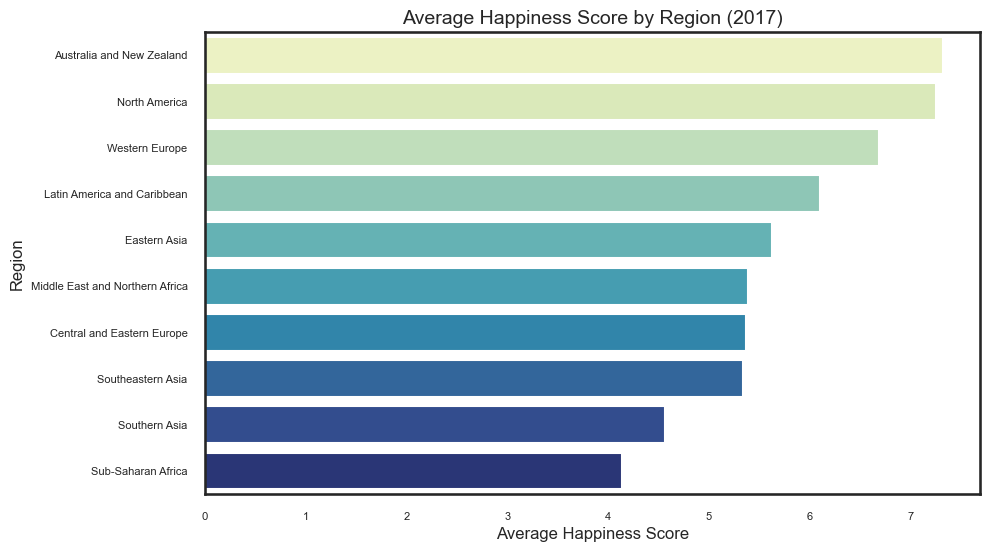

In [41]:
# Make sure you have these columns: 'Region' and 'Ladder score'
region_avg = data_2016.groupby('Region')['Happiness Score'].mean().sort_values(ascending=False)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x=region_avg.values, y=region_avg.index, palette='YlGnBu')
plt.title('Average Happiness Score by Region (2017)', fontsize=14)
plt.xlabel('Average Happiness Score')
plt.ylabel('Region')
plt.show()

#### 2015

C:\Users\Eastwood\AppData\Local\Temp\ipykernel_16848\639765576.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_avg.values, y=region_avg.index, palette='YlGnBu')


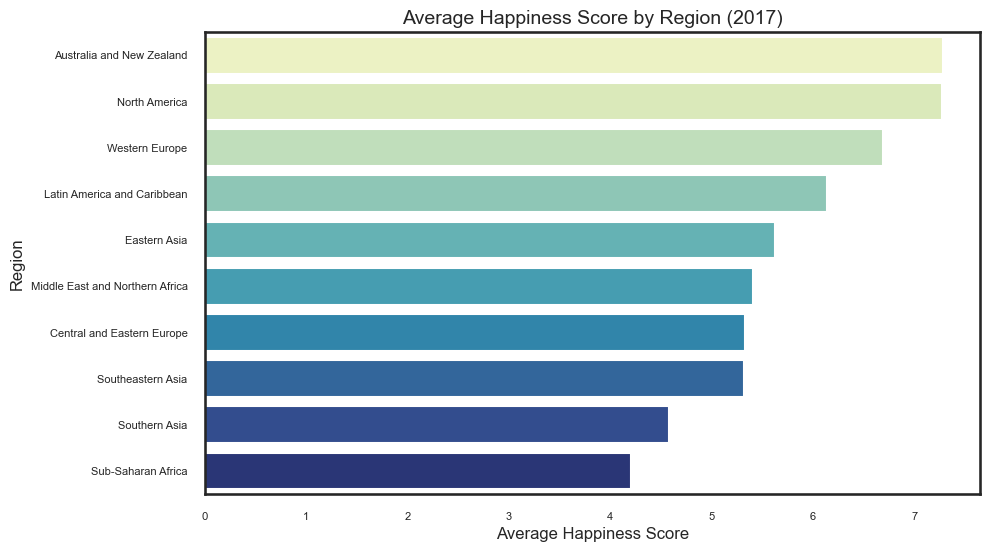

In [42]:
# Make sure you have these columns: 'Region' and 'Ladder score'
region_avg = data_2015.groupby('Region')['Happiness Score'].mean().sort_values(ascending=False)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x=region_avg.values, y=region_avg.index, palette='YlGnBu')
plt.title('Average Happiness Score by Region (2017)', fontsize=14)
plt.xlabel('Average Happiness Score')
plt.ylabel('Region')
plt.show()

## Cluster Models

Using the 2017 dataset for training the clusters

### TODO:
- Scale Data
- PCA
- K Means
- Hierarchical
- DBSCAN

### Data Scaling

#### 2017

In [43]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data_2017_num)

### PCA

#### 2017

In [44]:
pca_full = PCA()
X_pca_full = pca_full.fit_transform(X_scaled)

In [45]:
cumulative_variance = np.cumsum(pca_full.explained_variance_ratio_)

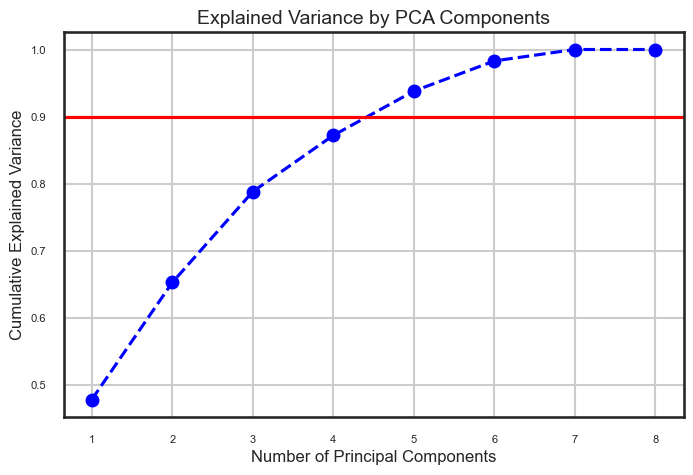

In [46]:
plt.figure(figsize=(8,5))
plt.plot(range(1, len(cumulative_variance)+1), cumulative_variance, marker='o', linestyle='--', color='b')
plt.axhline(y=0.90, color='r', linestyle='-')  # 90% line
plt.xlabel('Number of Principal Components', fontsize=12)
plt.ylabel('Cumulative Explained Variance', fontsize=12)
plt.title('Explained Variance by PCA Components', fontsize=14)
plt.grid(True)
plt.show()

In [47]:
n_components_90 = np.argmax(cumulative_variance >= 0.90) + 1
print(f"Number of components needed for 90% variance: {n_components_90}")

Number of components needed for 90% variance: 5


In [48]:
pca_opt = PCA(n_components=n_components_90)
X_pca_opt = pca_opt.fit_transform(X_scaled)

In [49]:
pca_df = pd.DataFrame(X_pca_opt, columns=[f'PC{i+1}' for i in range(n_components_90)])
pca_df['Country'] = data_2017['Country'].values

if 'Cluster_KMeans' in data_2017.columns:
    pca_df['Cluster'] = data_2017['Cluster_KMeans']
if 'Region' in data_2017.columns:
    pca_df['Region'] = data_2017['Region']


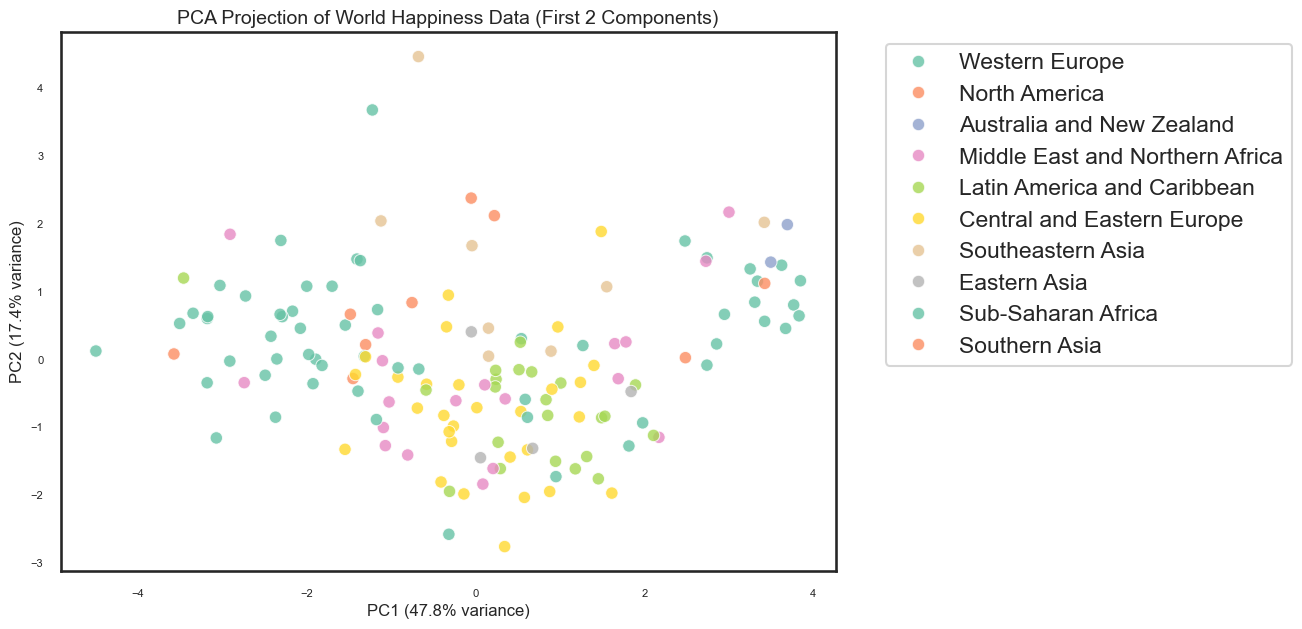

In [50]:
plt.figure(figsize=(10,7))
sns.scatterplot(
    data=pca_df,
    x='PC1', y='PC2',
    hue='Region' if 'Region' in pca_df.columns else 'Cluster' if 'Cluster' in pca_df.columns else None,
    palette='Set2',
    s=80,
    alpha=0.8
)
plt.title(f'PCA Projection of World Happiness Data (First 2 Components)', fontsize=14)
plt.xlabel(f'PC1 ({pca_opt.explained_variance_ratio_[0]*100:.1f}% variance)', fontsize=12)
plt.ylabel(f'PC2 ({pca_opt.explained_variance_ratio_[1]*100:.1f}% variance)', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [51]:
loadings = pd.DataFrame(pca_opt.components_.T, 
                        columns=[f'PC{i+1}' for i in range(n_components_90)], 
                        index=data_2017_num.columns)

print("\nPCA Loadings (Feature Contributions):\n")
display(loadings)


PCA Loadings (Feature Contributions):



PC1       PC2       PC3       PC4  \
Happiness Score                0.488940 -0.131557  0.218957  0.087655   
Economy (GDP per Capita)       0.446338 -0.181722 -0.290525 -0.034223   
Family                         0.409216 -0.143615 -0.167878  0.189079   
Health (Life Expectancy)       0.429821 -0.167670 -0.255726  0.143367   
Freedom                        0.334688  0.364943  0.209483 -0.188399   
Generosity                     0.102456  0.652255  0.139421  0.684253   
Trust (Government Corruption)  0.274541  0.460001  0.096585 -0.654261   
Dystopia Residual              0.107840 -0.361539  0.837511  0.055555   

                                    PC5  
Happiness Score               -0.066806  
Economy (GDP per Capita)      -0.199210  
Family                         0.428639  
Health (Life Expectancy)      -0.306736  
Freedom                        0.671187  
Generosity                    -0.232844  
Trust (Government Corruption) -0.390839  
Dystopia Residual             -0.143423

### K Means

#### 2017

Determine optimal k using the Elbow Method

In [52]:
# Determine optimal k using the Elbow Method
cluster_range = range(2, 11)  # try 2 to 10 clusters
inertia = []
silhouette_scores = []

In [53]:
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

Text(0.5, 1.0, 'Elbow Method for Optimal k')

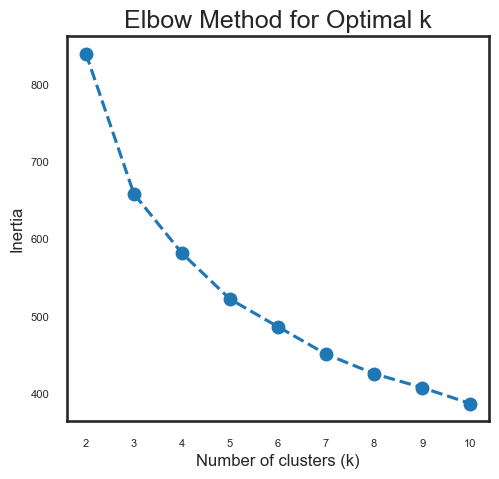

In [54]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(cluster_range, inertia, marker='o', linestyle='--')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')

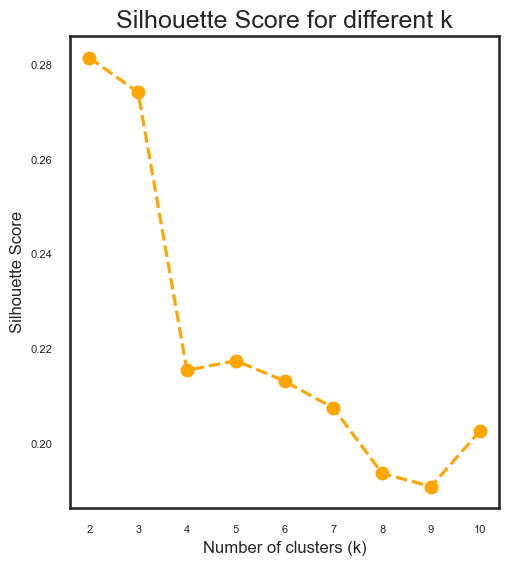

In [55]:
plt.subplot(1,2,2)
plt.plot(cluster_range, silhouette_scores, marker='o', linestyle='--', color='orange')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for different k')
plt.tight_layout()
plt.show()

In [56]:
optimal_k = cluster_range[silhouette_scores.index(max(silhouette_scores))]
print(f"Optimal number of clusters according to Silhouette Score: {optimal_k}")

Optimal number of clusters according to Silhouette Score: 2


In [57]:
kmeans_final = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
cluster_labels = kmeans_final.fit_predict(X_scaled)

In [58]:
data_2017['Cluster_KMeans'] = cluster_labels
pca_df['Cluster_KMeans'] = cluster_labels

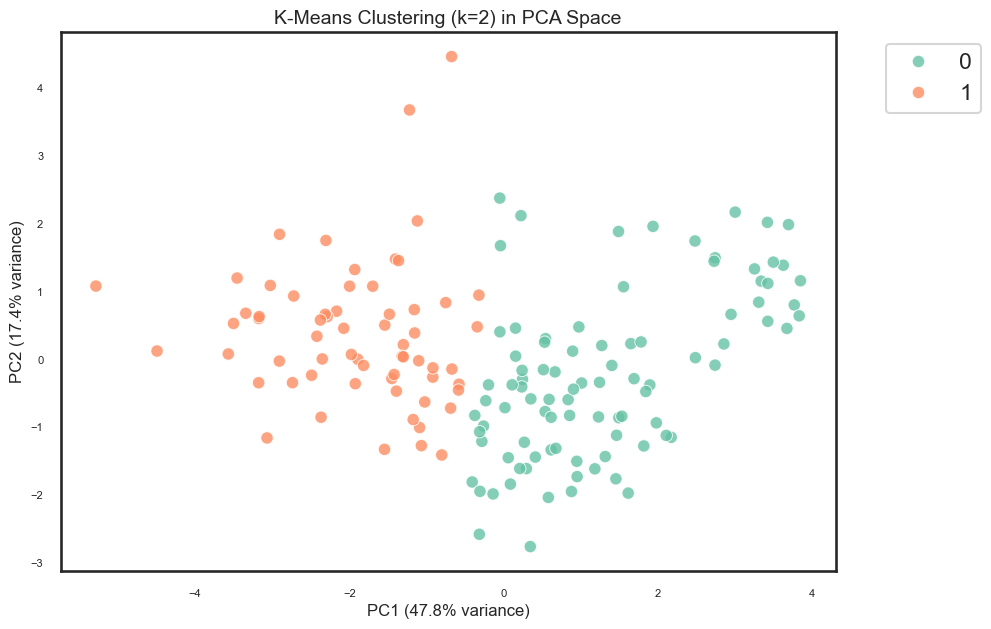

In [59]:
plt.figure(figsize=(10,7))
sns.scatterplot(
    data=pca_df,
    x='PC1', y='PC2',
    hue='Cluster_KMeans',
    palette='Set2',
    s=80,
    alpha=0.8
)
plt.title(f'K-Means Clustering (k={optimal_k}) in PCA Space', fontsize=14)
plt.xlabel(f'PC1 ({pca_opt.explained_variance_ratio_[0]*100:.1f}% variance)')
plt.ylabel(f'PC2 ({pca_opt.explained_variance_ratio_[1]*100:.1f}% variance)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [60]:
print("\nCluster Counts:")
print(data_2017['Cluster_KMeans'].value_counts().sort_index())


Cluster Counts:
Cluster_KMeans
0    92
1    63
Name: count, dtype: int64


### Hierarchical

#### 2017

In [61]:
import scipy.cluster.hierarchy as sch

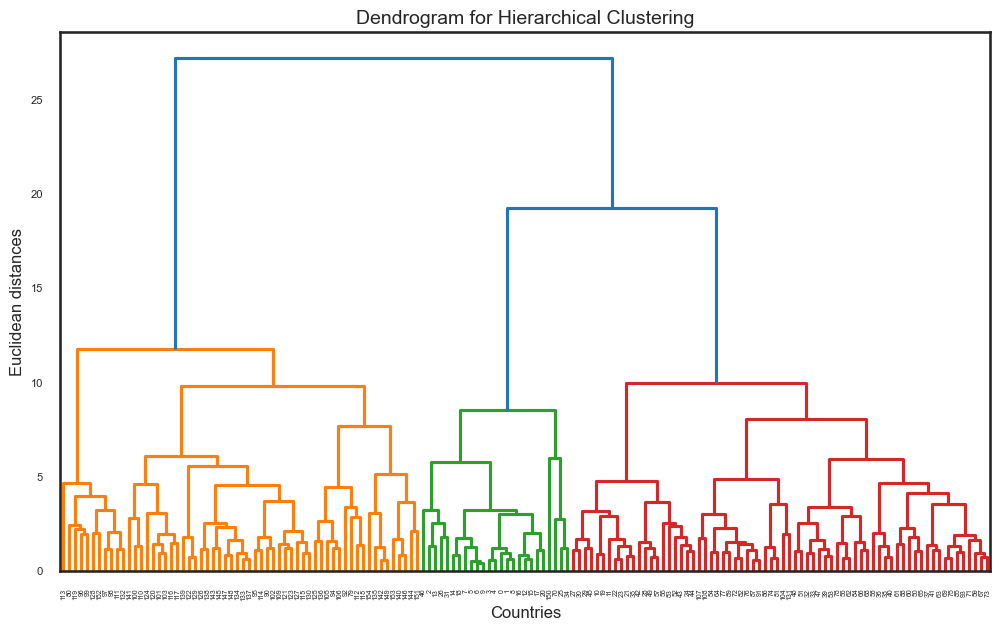

In [78]:
plt.figure(figsize=(12, 7))
dendrogram = sch.dendrogram(sch.linkage(X_scaled, method='ward'))
plt.title("Dendrogram for Hierarchical Clustering", fontsize=14)
plt.xlabel("Countries", fontsize=12)
plt.ylabel("Euclidean distances", fontsize=12)
plt.show()

In [63]:
optimal_clusters = 3  # Adjust based on dendrogram

In [64]:
hc = AgglomerativeClustering(n_clusters=optimal_clusters, metric='euclidean', linkage='ward')
hc_labels = hc.fit_predict(X_scaled)

In [65]:
data_2017['Cluster_HC'] = hc_labels
pca_df['Cluster_HC'] = hc_labels

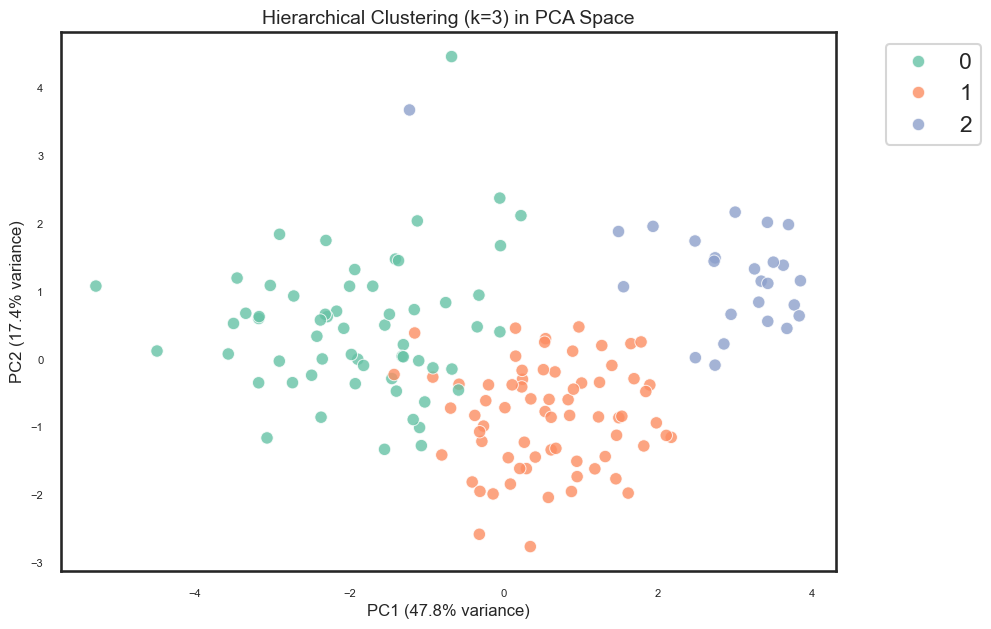

In [66]:
plt.figure(figsize=(10,7))
sns.scatterplot(
    data=pca_df,
    x='PC1', y='PC2',
    hue='Cluster_HC',
    palette='Set2',
    s=80,
    alpha=0.8
)
plt.title(f'Hierarchical Clustering (k={optimal_clusters}) in PCA Space', fontsize=14)
plt.xlabel(f'PC1 ({pca_opt.explained_variance_ratio_[0]*100:.1f}% variance)')
plt.ylabel(f'PC2 ({pca_opt.explained_variance_ratio_[1]*100:.1f}% variance)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [67]:
print("\nHierarchical Cluster Counts:")
print(data_2017['Cluster_HC'].value_counts().sort_index())


Hierarchical Cluster Counts:
Cluster_HC
0    60
1    70
2    25
Name: count, dtype: int64


#### DBSCAN

#### 2017

In [73]:
eps_values = [0.5, 1.0, 1.5, 2.0, 2.5, 3.0]  # example range
min_samples_values = [3, 5, 7, 10]

best_eps = None
best_min_samples = None
best_silhouette = -1

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(X_scaled)
        # Skip if only one cluster or all noise
        if len(set(labels)) <= 1 or len(set(labels)) == len(labels):
            continue
        silhouette_avg = silhouette_score(X_scaled, labels)
        if silhouette_avg > best_silhouette:
            best_silhouette = silhouette_avg
            best_eps = eps
            best_min_samples = min_samples

print(f"Best DBSCAN params: eps={best_eps}, min_samples={best_min_samples}, silhouette={best_silhouette:.3f}")

Best DBSCAN params: eps=2.5, min_samples=3, silhouette=0.342


In [74]:
dbscan_final = DBSCAN(eps=best_eps, min_samples=best_min_samples)
db_labels = dbscan_final.fit_predict(X_scaled)

In [75]:
data_2017['Cluster_DBSCAN'] = db_labels
pca_df['Cluster_DBSCAN'] = db_labels

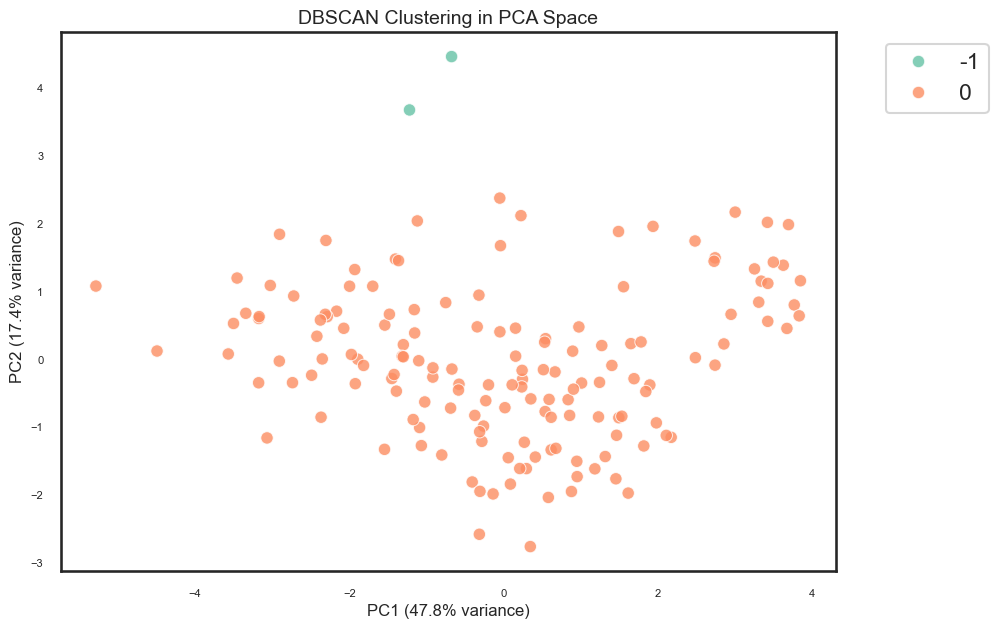

In [76]:
plt.figure(figsize=(10,7))
sns.scatterplot(
    data=pca_df,
    x='PC1', y='PC2',
    hue='Cluster_DBSCAN',
    palette='Set2',
    s=80,
    alpha=0.8
)
plt.title(f'DBSCAN Clustering in PCA Space', fontsize=14)
plt.xlabel(f'PC1 ({pca_opt.explained_variance_ratio_[0]*100:.1f}% variance)')
plt.ylabel(f'PC2 ({pca_opt.explained_variance_ratio_[1]*100:.1f}% variance)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [77]:
print("\nDBSCAN Cluster Counts:")
print(pd.Series(db_labels).value_counts().sort_index())


DBSCAN Cluster Counts:
-1      2
 0    153
Name: count, dtype: int64


### Mean Shift

#### 2017

In [79]:
from sklearn.cluster import MeanShift, estimate_bandwidth

In [80]:
bandwidth = estimate_bandwidth(X_scaled, quantile=0.2, n_samples=500)
print(f"Estimated bandwidth: {bandwidth:.3f}")

Estimated bandwidth: 2.665


In [81]:
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms_labels = ms.fit_predict(X_scaled)

In [82]:
data_2017['Cluster_MeanShift'] = ms_labels
pca_df['Cluster_MeanShift'] = ms_labels

In [83]:
n_clusters_ms = len(np.unique(ms_labels))
print(f"Number of clusters found by Mean Shift: {n_clusters_ms}")

Number of clusters found by Mean Shift: 3


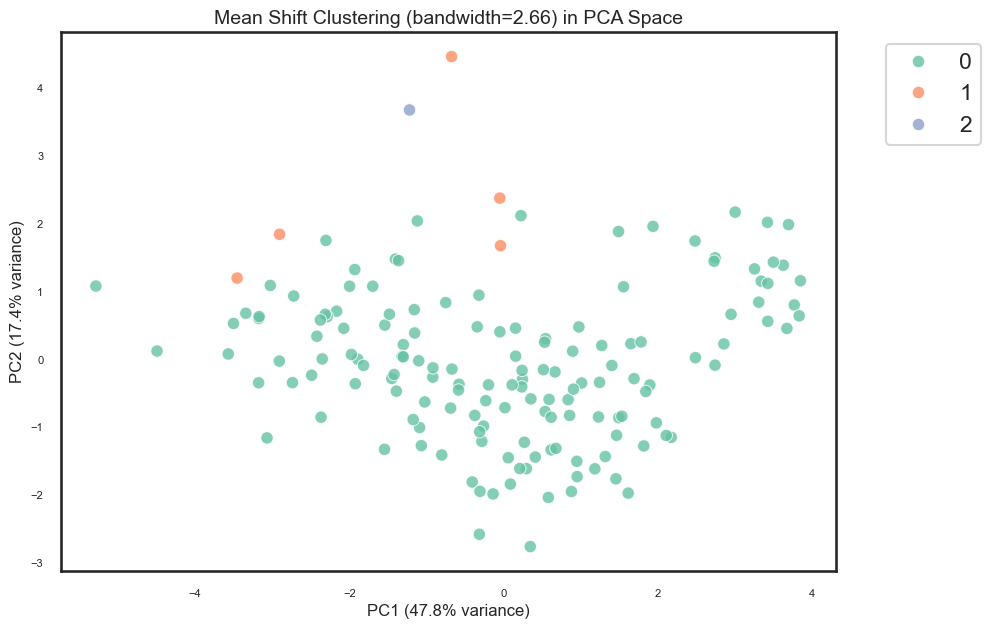

In [84]:
plt.figure(figsize=(10,7))
sns.scatterplot(
    data=pca_df,
    x='PC1', y='PC2',
    hue='Cluster_MeanShift',
    palette='Set2',
    s=80,
    alpha=0.8
)
plt.title(f'Mean Shift Clustering (bandwidth={bandwidth:.2f}) in PCA Space', fontsize=14)
plt.xlabel(f'PC1 ({pca_opt.explained_variance_ratio_[0]*100:.1f}% variance)')
plt.ylabel(f'PC2 ({pca_opt.explained_variance_ratio_[1]*100:.1f}% variance)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [85]:
print("\nMean Shift Cluster Counts:")
print(pd.Series(ms_labels).value_counts().sort_index())


Mean Shift Cluster Counts:
0    149
1      5
2      1
Name: count, dtype: int64
